In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


xml to txt

In [3]:
import xml.etree.ElementTree as ET
import os
from PIL import Image

# 设置文件夹路径
xml_folder = '/content/drive/MyDrive/dataset/Dataset/labels'  # XML标签文件夹
txt_folder = '/content/drive/MyDrive/dataset/Dataset/labels-txt'  # YOLO标签文件夹
class_names = ['1']  # 假设类别是 '1'，根据实际情况修改

# 创建输出文件夹，如果不存在的话
os.makedirs(txt_folder, exist_ok=True)

def convert_xml_to_yolo(xml_file, txt_file):
    # 解析XML文件
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # 获取图像的宽度和高度
    size = root.find('size')
    img_width = int(size.find('width').text)
    img_height = int(size.find('height').text)

    # 打开txt文件准备写入
    with open(txt_file, 'w') as f:
        for obj in root.iter('object'):
            # 获取类别ID
            class_name = obj.find('name').text
            # class_id = class_names.index(class_name)  # 假设类别在 class_names 列表中

            # 获取边界框信息
            bndbox = obj.find('bndbox')
            xmin = float(bndbox.find('xmin').text)
            ymin = float(bndbox.find('ymin').text)
            xmax = float(bndbox.find('xmax').text)
            ymax = float(bndbox.find('ymax').text)

            # 计算 YOLO 格式的坐标
            x_center = (xmin + xmax) / 2.0 / img_width
            y_center = (ymin + ymax) / 2.0 / img_height
            width = (xmax - xmin) / img_width
            height = (ymax - ymin) / img_height

            # 将标签写入 txt 文件
            f.write(f"{class_name} {x_center} {y_center} {width} {height}\n")

# 处理每个 XML 文件
for xml_file in os.listdir(xml_folder):
    if xml_file.endswith('.xml'):
        # 获取XML文件路径
        xml_path = os.path.join(xml_folder, xml_file)

        # 获取图像文件名（假设图像是 .tif 格式）
        img_name = xml_file.replace('.xml', '.tif')  # 假设图像是 .tif 格式

        # 生成对应的 YOLO 格式的标签文件
        txt_path = os.path.join(txt_folder, img_name.replace('.tif', '.txt'))
        convert_xml_to_yolo(xml_path, txt_path)
        print(f"已生成{xml_path}")

print("所有标签文件已转换为 YOLO 格式。")

已生成/content/drive/MyDrive/dataset/Dataset/labels/000000001205.xml
已生成/content/drive/MyDrive/dataset/Dataset/labels/000000001429.xml
已生成/content/drive/MyDrive/dataset/Dataset/labels/000000001043.xml
已生成/content/drive/MyDrive/dataset/Dataset/labels/000000001032.xml
已生成/content/drive/MyDrive/dataset/Dataset/labels/000000001424.xml
已生成/content/drive/MyDrive/dataset/Dataset/labels/000000001720.xml
已生成/content/drive/MyDrive/dataset/Dataset/labels/000000001202.xml
已生成/content/drive/MyDrive/dataset/Dataset/labels/000000001437.xml
已生成/content/drive/MyDrive/dataset/Dataset/labels/000000001211.xml
已生成/content/drive/MyDrive/dataset/Dataset/labels/000000001210.xml
已生成/content/drive/MyDrive/dataset/Dataset/labels/000000001196.xml
已生成/content/drive/MyDrive/dataset/Dataset/labels/000000001047.xml
已生成/content/drive/MyDrive/dataset/Dataset/labels/000000001707.xml
已生成/content/drive/MyDrive/dataset/Dataset/labels/000000001201.xml
已生成/content/drive/MyDrive/dataset/Dataset/labels/000000001428.xml
已生成/conten

tif to jpg

In [4]:
import os
from PIL import Image

# 设置文件夹路径
input_folder = '/content/drive/MyDrive/dataset/Dataset/images'  # tif 文件夹路径
output_folder = '/content/drive/MyDrive/dataset/Dataset/img-jpg'  # 输出 jpg 文件夹路径

# 创建输出文件夹（如果不存在）
os.makedirs(output_folder, exist_ok=True)

# 遍历文件夹中的所有 tif 文件
for tif_file in os.listdir(input_folder):
    if tif_file.endswith('.tif'):
        # 获取 tif 文件的完整路径
        tif_path = os.path.join(input_folder, tif_file)

        # 打开 tif 文件
        img = Image.open(tif_path)

        # 获取文件名（去除扩展名）
        file_name = os.path.splitext(tif_file)[0]

        # 定义输出 jpg 文件的路径
        jpg_path = os.path.join(output_folder, f"{file_name}.jpg")

        # 转换并保存为 jpg
        img.convert("RGB").save(jpg_path, "JPEG")

        print(f"已转换 {tif_file} 为 {file_name}.jpg")

print("所有 tif 文件已转换为 jpg 格式。")


已转换 000000001849.tif 为 000000001849.jpg
已转换 000000002025.tif 为 000000002025.jpg
已转换 000000002504.tif 为 000000002504.jpg
已转换 000000002250.tif 为 000000002250.jpg
已转换 000000001832.tif 为 000000001832.jpg
已转换 000000002514.tif 为 000000002514.jpg
已转换 000000002246.tif 为 000000002246.jpg
已转换 000000002500.tif 为 000000002500.jpg
已转换 000000002022.tif 为 000000002022.jpg
已转换 000000002260.tif 为 000000002260.jpg
已转换 000000001846.tif 为 000000001846.jpg
已转换 000000002518.tif 为 000000002518.jpg
已转换 000000002251.tif 为 000000002251.jpg
已转换 000000001831.tif 为 000000001831.jpg
已转换 000000002516.tif 为 000000002516.jpg
已转换 000000002505.tif 为 000000002505.jpg
已转换 000000001837.tif 为 000000001837.jpg
已转换 000000002261.tif 为 000000002261.jpg
已转换 000000002508.tif 为 000000002508.jpg
已转换 000000002263.tif 为 000000002263.jpg
已转换 000000002509.tif 为 000000002509.jpg
已转换 000000002257.tif 为 000000002257.jpg
已转换 000000001839.tif 为 000000001839.jpg
已转换 000000002522.tif 为 000000002522.jpg
已转换 000000002503.tif 为 000000002503.jpg


In [6]:
import os

# 设置文件夹路径
folder_path = '/content/drive/MyDrive/dataset/Dataset/labels-txt'  # 替换为你的文件夹路径

# 获取文件夹中的所有文件，并筛选出 .jpg 文件
jpg_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith('.txt')]

# 统计 .jpg 文件数量
num_jpg_files = len(jpg_files)

print(f"文件夹中共有 {num_jpg_files} 个 .jpg 文件。")

文件夹中共有 1883 个 .jpg 文件。


划分数据集

In [8]:
import os
import random
import shutil

# 设置源文件夹路径
img_folder = '/content/drive/MyDrive/dataset/Dataset/img-jpg'  # 替换为你的 Img 文件夹路径
label_folder = '/content/drive/MyDrive/dataset/Dataset/labels-txt'  # 替换为你的 Label 文件夹路径（txt标签文件）

# 设置目标文件夹路径
train_img_folder = '/content/drive/MyDrive/dataset/yolo/dataset/train/images'
train_label_folder = '/content/drive/MyDrive/dataset/yolo/dataset/train/labels'
val_img_folder = '/content/drive/MyDrive/dataset/yolo/dataset/val/images'
val_label_folder = '/content/drive/MyDrive/dataset/yolo/dataset/val/labels'

# 创建目标文件夹
os.makedirs(train_img_folder, exist_ok=True)
os.makedirs(train_label_folder, exist_ok=True)
os.makedirs(val_img_folder, exist_ok=True)
os.makedirs(val_label_folder, exist_ok=True)

# 获取 Img 文件夹中的所有 .jpg 图像文件
image_files = [f for f in os.listdir(img_folder) if f.endswith('.jpg')]

# 打乱图像文件
random.shuffle(image_files)

# 按 8:2 划分训练集和验证集
train_size = int(0.8 * len(image_files))
train_images = image_files[:train_size]
val_images = image_files[train_size:]

# 将图像和标签分别复制到新的文件夹
for img_file in train_images:
    # 获取图像和标签的路径
    img_path = os.path.join(img_folder, img_file)
    label_path = os.path.join(label_folder, img_file.replace('.jpg', '.txt'))  # 标签是txt格式

    # 复制图像文件到训练集 images 文件夹
    shutil.copy(img_path, os.path.join(train_img_folder, img_file))

    # 复制对应的标签文件到训练集 labels 文件夹
    shutil.copy(label_path, os.path.join(train_label_folder, img_file.replace('.jpg', '.txt')))

for img_file in val_images:
    # 获取图像和标签的路径
    img_path = os.path.join(img_folder, img_file)
    label_path = os.path.join(label_folder, img_file.replace('.jpg', '.txt'))  # 标签是txt格式

    # 复制图像文件到验证集 images 文件夹
    shutil.copy(img_path, os.path.join(val_img_folder, img_file))

    # 复制对应的标签文件到验证集 labels 文件夹
    shutil.copy(label_path, os.path.join(val_label_folder, img_file.replace('.jpg', '.txt')))

print("数据集划分完成。")


数据集划分完成。


下载yolo

In [2]:
# Install the ultralytics package from PyPI
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

开始训练

In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.yaml")  # build a new model from YAML
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolo11n.yaml").load("yolo11n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data="/content/drive/MyDrive/dataset/yolo/dataset/data.yaml", epochs=50, imgsz=256)

# 保存模型
model.save('best.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 82.1MB/s]


Transferred 499/499 items from pretrained weights
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.yaml, data=/content/drive/MyDrive/dataset/yolo/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=

100%|██████████| 755k/755k [00:00<00:00, 25.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/dataset/yolo/dataset/train/labels... 1506 images, 0 backgrounds, 4 corrupt: 100%|██████████| 1506/1506 [12:01<00:00,  2.09it/s]

train: WARNING ⚠️ /content/drive/MyDrive/dataset/yolo/dataset/train/images/000000002558.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 2. Possible class labels are 0-1
train: WARNING ⚠️ /content/drive/MyDrive/dataset/yolo/dataset/train/images/000000002560.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 2. Possible class labels are 0-1
train: WARNING ⚠️ /content/drive/MyDrive/dataset/yolo/dataset/train/images/000000002561.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 2. Possible class labels are 0-1
train: WARNING ⚠️ /content/drive/MyDrive/dataset/yolo/dataset/train/images/000000002781.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 2. Possible class labels are 0-1


train: New cache created: /content/drive/MyDrive/dataset/yolo/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/dataset/yolo/dataset/val/labels... 377 images, 0 backgrounds, 2 corrupt: 100%|██████████| 377/377 [02:52<00:00,  2.19it/s]

val: WARNING ⚠️ /content/drive/MyDrive/dataset/yolo/dataset/val/images/000000002559.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/drive/MyDrive/dataset/yolo/dataset/val/images/000000002783.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 2. Possible class labels are 0-1


val: New cache created: /content/drive/MyDrive/dataset/yolo/dataset/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      0.49G      1.799      2.394      1.362         66        256: 100%|██████████| 94/94 [00:20<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]

                   all        375       1235      0.746      0.534      0.595      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.455G      1.698      1.378      1.294         46        256: 100%|██████████| 94/94 [00:18<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]

                   all        375       1235      0.743      0.589      0.652       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.467G      1.705      1.338      1.298         86        256: 100%|██████████| 94/94 [00:18<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]


                   all        375       1235      0.729       0.62       0.66      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.467G      1.695      1.285      1.306         49        256: 100%|██████████| 94/94 [00:18<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.14it/s]


                   all        375       1235      0.703      0.586      0.635      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.467G      1.658      1.247      1.269         41        256: 100%|██████████| 94/94 [00:18<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]


                   all        375       1235      0.699      0.602       0.65      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.467G      1.639      1.216      1.272         73        256: 100%|██████████| 94/94 [00:18<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]


                   all        375       1235      0.781      0.608       0.69      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.465G      1.647      1.191      1.274         47        256: 100%|██████████| 94/94 [00:18<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]


                   all        375       1235        0.7      0.566      0.644      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.465G      1.615      1.164      1.254         41        256: 100%|██████████| 94/94 [00:17<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]


                   all        375       1235      0.733      0.622      0.672      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.465G      1.606      1.139      1.261         54        256: 100%|██████████| 94/94 [00:19<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]


                   all        375       1235      0.744      0.607      0.678      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.465G      1.586      1.123      1.254         75        256: 100%|██████████| 94/94 [00:17<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.96it/s]

                   all        375       1235      0.793      0.648      0.721      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.445G      1.579       1.11      1.237         82        256: 100%|██████████| 94/94 [00:17<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]

                   all        375       1235      0.792       0.65      0.721      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.465G       1.58      1.097      1.233         76        256: 100%|██████████| 94/94 [00:18<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]


                   all        375       1235      0.747      0.653      0.714      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.465G      1.565      1.084      1.236         36        256: 100%|██████████| 94/94 [00:17<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]

                   all        375       1235      0.745      0.627       0.69      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.445G       1.57      1.086       1.23         57        256: 100%|██████████| 94/94 [00:18<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]


                   all        375       1235      0.751      0.638      0.705      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.467G      1.562      1.073      1.232         52        256: 100%|██████████| 94/94 [00:18<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]

                   all        375       1235      0.804      0.666      0.743      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.463G      1.544      1.037      1.218         59        256: 100%|██████████| 94/94 [00:17<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]

                   all        375       1235      0.757      0.674      0.725       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.465G      1.517      1.042      1.214         56        256: 100%|██████████| 94/94 [00:18<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]


                   all        375       1235      0.789      0.623       0.71      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.465G      1.536      1.049      1.216         65        256: 100%|██████████| 94/94 [00:17<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]

                   all        375       1235      0.775      0.674       0.74      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.445G      1.544      1.041      1.218         54        256: 100%|██████████| 94/94 [00:17<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]


                   all        375       1235      0.807      0.675      0.752      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.465G      1.514      1.019      1.214         70        256: 100%|██████████| 94/94 [00:18<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        375       1235      0.794      0.627      0.715      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.445G      1.522      1.008      1.209         61        256: 100%|██████████| 94/94 [00:17<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.44it/s]

                   all        375       1235        0.8      0.636      0.724      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.463G      1.499     0.9988      1.205         49        256: 100%|██████████| 94/94 [00:17<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]


                   all        375       1235      0.816      0.658      0.742      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.465G      1.491     0.9826      1.201         69        256: 100%|██████████| 94/94 [00:18<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]


                   all        375       1235      0.786      0.632      0.714      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.465G      1.482     0.9756      1.191         58        256: 100%|██████████| 94/94 [00:17<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]

                   all        375       1235      0.812      0.659      0.742      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.465G      1.491     0.9965      1.197         67        256: 100%|██████████| 94/94 [00:18<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]


                   all        375       1235      0.816      0.657       0.74      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.465G      1.481      0.984      1.199         53        256: 100%|██████████| 94/94 [00:17<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.02it/s]

                   all        375       1235      0.814      0.697      0.769       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.463G      1.482     0.9625      1.194         67        256: 100%|██████████| 94/94 [00:17<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        375       1235      0.794      0.692       0.76       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.443G      1.462     0.9561       1.18         68        256: 100%|██████████| 94/94 [00:18<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]

                   all        375       1235      0.803       0.73      0.779      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.463G      1.452     0.9484      1.185         31        256: 100%|██████████| 94/94 [00:17<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]

                   all        375       1235      0.816      0.713      0.779      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.463G      1.448     0.9411      1.178         62        256: 100%|██████████| 94/94 [00:18<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]

                   all        375       1235      0.813        0.7      0.768      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.463G       1.47     0.9478      1.187         71        256: 100%|██████████| 94/94 [00:18<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.33it/s]

                   all        375       1235      0.819      0.711      0.776      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.463G      1.435     0.9396       1.17         87        256: 100%|██████████| 94/94 [00:17<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]


                   all        375       1235      0.819      0.667      0.749      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.465G      1.442     0.9208      1.173         59        256: 100%|██████████| 94/94 [00:19<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.33it/s]


                   all        375       1235      0.846      0.698      0.783       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.443G      1.422        0.9      1.166         64        256: 100%|██████████| 94/94 [00:17<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.88it/s]

                   all        375       1235      0.824      0.681      0.776      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.445G       1.41     0.8918      1.159         41        256: 100%|██████████| 94/94 [00:17<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]

                   all        375       1235      0.799      0.698       0.77      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.463G      1.427     0.9172      1.168         78        256: 100%|██████████| 94/94 [00:18<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]

                   all        375       1235      0.819      0.713      0.783      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.463G      1.404     0.8967      1.154         63        256: 100%|██████████| 94/94 [00:17<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]

                   all        375       1235       0.85      0.691      0.793      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.443G      1.398     0.8836      1.159         57        256: 100%|██████████| 94/94 [00:18<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]

                   all        375       1235      0.864      0.674      0.779      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.463G       1.39     0.8986      1.151         59        256: 100%|██████████| 94/94 [00:18<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.37it/s]


                   all        375       1235      0.828      0.704      0.786      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.443G      1.398     0.8828       1.15         63        256: 100%|██████████| 94/94 [00:17<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]


                   all        375       1235      0.829      0.723      0.788      0.454
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.443G      1.387     0.8453      1.172         33        256: 100%|██████████| 94/94 [00:19<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]


                   all        375       1235      0.854      0.693      0.781      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.443G      1.341     0.8233      1.149         22        256: 100%|██████████| 94/94 [00:17<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.92it/s]

                   all        375       1235      0.841      0.713      0.794      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.443G      1.344     0.8121       1.15         35        256: 100%|██████████| 94/94 [00:17<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]

                   all        375       1235      0.832      0.687      0.775       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.443G      1.329     0.7971       1.14         32        256: 100%|██████████| 94/94 [00:18<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]


                   all        375       1235      0.849      0.712      0.791      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.443G      1.332     0.7881      1.145         23        256: 100%|██████████| 94/94 [00:17<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.33it/s]

                   all        375       1235      0.838      0.721      0.796      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.443G      1.324      0.778      1.141         47        256: 100%|██████████| 94/94 [00:18<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        375       1235      0.841      0.715      0.795      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.443G      1.304     0.7814      1.144         29        256: 100%|██████████| 94/94 [00:17<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.07it/s]

                   all        375       1235      0.854      0.715      0.803      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.443G      1.305     0.7759       1.14         27        256: 100%|██████████| 94/94 [00:17<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]

                   all        375       1235      0.837      0.737      0.803      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.443G      1.297     0.7533      1.134         35        256: 100%|██████████| 94/94 [00:18<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        375       1235      0.845      0.726      0.804      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.443G      1.289     0.7621      1.129         44        256: 100%|██████████| 94/94 [00:17<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]

                   all        375       1235      0.832      0.732      0.802      0.479



50 epochs completed in 0.308 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.69it/s]


                   all        375       1235      0.833      0.743      0.804      0.482
              building        375       1235      0.833      0.743      0.804      0.482
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


val验证


In [10]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # load an official model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/dataset/yolo/dataset/val/labels.cache... 377 images, 0 backgrounds, 2 corrupt: 100%|██████████| 377/377 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/dataset/yolo/dataset/val/images/000000002559.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/drive/MyDrive/dataset/yolo/dataset/val/images/000000002783.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 2. Possible class labels are 0-1



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.00it/s]


                   all        375       1235      0.837      0.735      0.801      0.482
              building        375       1235      0.837      0.735      0.801      0.482
Speed: 0.4ms preprocess, 2.5ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val2


array([    0.48178,     0.48178])

预测


image 1/1 /content/drive/MyDrive/dataset/yolo/dataset/val/images/000000003287.jpg: 256x256 3 buildings, 10.9ms
Speed: 1.0ms preprocess, 10.9ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 256)


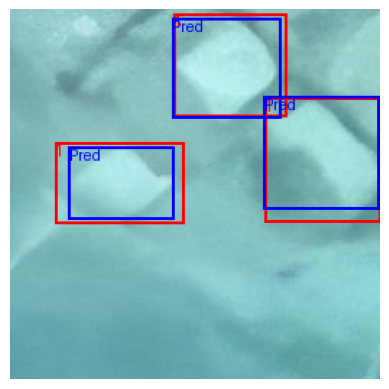

In [8]:
import os
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from ultralytics import YOLO
import matplotlib.pyplot as plt

# 加载模型
model = YOLO("/content/best.pt")  # 替换为您的模型路径

# 定义图像路径和标签路径
image_path = "/content/drive/MyDrive/dataset/yolo/dataset/val/images/000000003287.jpg"
label_path = "/content/drive/MyDrive/dataset/yolo/dataset/val/labels/000000003287.txt"

# 读取图像
image = Image.open(image_path)
image_np = np.array(image)

# 读取标签文件
with open(label_path, 'r') as file:
    labels = file.readlines()

# 解析标签
for label in labels:
    parts = label.strip().split()
    class_id = int(parts[0])
    x_center, y_center, width, height = map(float, parts[1:])

    # 将归一化坐标转换为像素坐标
    img_width, img_height = image.size
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # 计算边界框的左上角和右下角坐标
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    # 绘制边界框
    draw = ImageDraw.Draw(image)
    draw.rectangle([x1, y1, x2, y2], outline="red", width=2)

    # 绘制类别标签
    font = ImageFont.load_default()
    draw.text((x1, y1), str(class_id), fill="red", font=font)

# 使用模型进行预测
results = model(image_path)

# 获取预测结果
for result in results:
    # 绘制预测的边界框
    boxes = result.boxes.xyxy  # 获取预测的边界框坐标
    for box in boxes:
        x1, y1, x2, y2 = box
        draw.rectangle([x1, y1, x2, y2], outline="blue", width=2)
        draw.text((x1, y1), "Pred", fill="blue", font=font)

# 显示结果
plt.imshow(image)
plt.axis('off')
plt.show()



0: 256x256 1 building, 11.2ms
Speed: 0.8ms preprocess, 11.2ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 256)


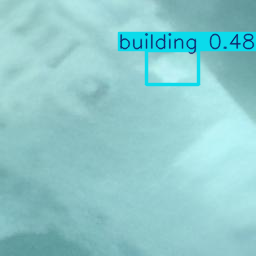

In [5]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/best.pt")  # pretrained YOLO11n model

# Run batched inference on a list of images
results = model(["/content/drive/MyDrive/dataset/yolo/dataset/train/images/000000002851.jpg"])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    # result.save(filename="result.jpg")  # save to disk